In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from merge_data import last_day_of_month
import datetime as dt
import xarray as xr
import cartopy.crs as ccrs
import tqdm 


In [31]:
hist_conv = pd.DataFrame()

for y in tqdm.tqdm(np.arange(1985,2006)):
    for m in [12,1,2]:
        date = dt.datetime(y,m,1)
        try:
            f = xr.open_dataset("/scratch/eg3/ab4502/barpa_scw_ACCESS1-0_historical_0_"+date.strftime("%Y%m%d")+"_"+last_day_of_month(dt.datetime(y,m,1)).strftime("%Y%m%d")+".nc")
            hist_conv = pd.concat([
                xr.where(f.wgr_dmax>=1.5,f.gust_dmax,np.nan,keep_attrs=True).to_dataframe().wgr_dmax.dropna().reset_index().drop(columns=["latitude","longitude"]).set_index("date"),
                hist_conv])
        except:
            print("Skipping "+date.strftime("%Y%m%d")+"...")


  5%|▍         | 1/21 [00:01<00:30,  1.54s/it]

Skipping 19850101...
Skipping 19850201...



 95%|█████████▌| 20/21 [01:47<00:05,  5.65s/it]

Skipping 20051201...



100%|██████████| 21/21 [01:51<00:00,  5.31s/it]


In [3]:
rcp_conv = pd.DataFrame()

for y in tqdm.tqdm(np.arange(2039,2060)):
    for m in [12,1,2]:
        date = dt.datetime(y,m,1)
        try:
            f = xr.open_dataset("/scratch/eg3/ab4502/barpa_scw_ACCESS1-0_rcp85_0_"+date.strftime("%Y%m%d")+"_"+last_day_of_month(dt.datetime(y,m,1)).strftime("%Y%m%d")+".nc")
            rcp_conv = pd.concat([rcp_conv,
                                  xr.where(f.wgr_dmax>=1.5,f.gust_dmax,np.nan,keep_attrs=True).to_dataframe().wgr_dmax.dropna().reset_index().drop(columns=["latitude","longitude"]).set_index("date")],
                                axis=0)
        except:
            print("Skipping "+date.strftime("%Y%m%d")+"...")

  5%|▍         | 1/21 [00:02<00:41,  2.05s/it]

Skipping 20390101...
Skipping 20390201...


 95%|█████████▌| 20/21 [02:31<00:08,  8.33s/it]

Skipping 20591201...


100%|██████████| 21/21 [02:36<00:00,  7.45s/it]


In [35]:
hist_conv_years = hist_conv.index.year
hist_conv_values = hist_conv.values

rcp_conv_years = rcp_conv.index.year
rcp_conv_values = rcp_conv.values


In [5]:
# hist_all = pd.DataFrame()
# hist_conv = pd.DataFrame()

# for y in np.arange(1985,2006):
#     for m in [12,1,2]:
#         date = dt.datetime(y,m,1)
#         try:
#             hist_all = pd.concat([hist_all,
#                               pd.read_csv("/scratch/eg3/ab4502/barpa_scw_ddmax_ACCESS1-0_historical_0_"+date.strftime("%Y%m%d")+"_"+last_day_of_month(dt.datetime(y,m,1)).strftime("%Y%m%d")+".csv")],
#                              axis=0)
#             hist_conv = pd.concat([hist_conv,
#                               pd.read_csv("/scratch/eg3/ab4502/barpa_scw_ddmax_conv_ACCESS1-0_historical_0_"+date.strftime("%Y%m%d")+"_"+last_day_of_month(dt.datetime(y,m,1)).strftime("%Y%m%d")+".csv")],
#                              axis=0)            
#         except:
#             print("Skipping "+date.strftime("%Y%m%d")+"...")

In [6]:
# rcp_all = pd.DataFrame()
# rcp_conv = pd.DataFrame()

# for y in np.arange(2039,2060):
#     for m in [12,1,2]:
#         date = dt.datetime(y,m,1)
#         try:
#             rcp_all = pd.concat([rcp_all,
#                               pd.read_csv("/scratch/eg3/ab4502/barpa_scw_ddmax_ACCESS1-0_rcp85_0_"+date.strftime("%Y%m%d")+"_"+last_day_of_month(dt.datetime(y,m,1)).strftime("%Y%m%d")+".csv")],
#                              axis=0)
#             rcp_conv = pd.concat([rcp_conv,
#                               pd.read_csv("/scratch/eg3/ab4502/barpa_scw_ddmax_conv_ACCESS1-0_rcp85_0_"+date.strftime("%Y%m%d")+"_"+last_day_of_month(dt.datetime(y,m,1)).strftime("%Y%m%d")+".csv")],
#                              axis=0)            
#         except:
#             print("Skipping "+date.strftime("%Y%m%d")+"...")

In [42]:
lat_slice = slice(-44,-29.5)
lon_slice = slice(136,154)
rolling = 0

max_hist = xr.open_dataset("/g/data/eg3/ab4502/ExtremeWind/aus/barpa_access/barpac_max_hist_monthly.nc").sel(lat=lat_slice,lon=lon_slice)
max_rcp = xr.open_dataset("/g/data/eg3/ab4502/ExtremeWind/aus/barpa_access/barpac_max_rcp_monthly.nc").sel(lat=lat_slice,lon=lon_slice)


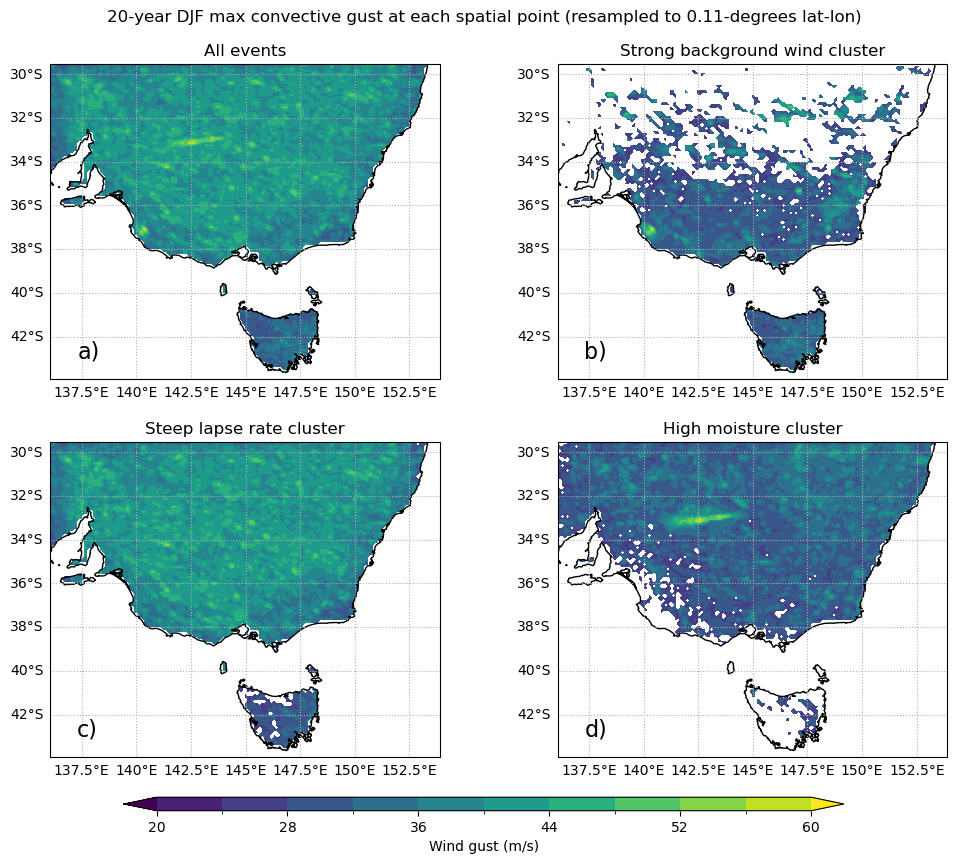

In [43]:
levs=np.linspace(20,60,11)

plt.figure(figsize=[12,9])

ax=plt.subplot(2,2,1,projection=ccrs.PlateCarree())
xr.plot.contourf(max_hist.max("year_month")["max"],levels=levs,extend="both",add_colorbar=False)
ax.coastlines()
plt.title("All events")
plt.suptitle("20-year DJF max convective gust at each spatial point (resampled to 0.11-degrees lat-lon)",y=0.94)
ax.gridlines(ls=":",draw_labels=["bottom","left"])
ax.text(137.3,-43,"a)",size=16)
    
ax=plt.subplot(2,2,2,projection=ccrs.PlateCarree())
xr.plot.contourf(max_hist.max("year_month")["cluster0_max"],levels=levs,extend="both",add_colorbar=False)
ax.coastlines()
plt.title("Strong background wind cluster")
ax.gridlines(ls=":",draw_labels=["bottom","left"])
ax.text(137.3,-43,"b)",size=16)

ax=plt.subplot(2,2,3,projection=ccrs.PlateCarree())
xr.plot.contourf(max_hist.max("year_month")["cluster1_max"],levels=levs,extend="both",add_colorbar=False)
ax.coastlines()
plt.title("Steep lapse rate cluster")
ax.gridlines(ls=":",draw_labels=["bottom","left"])
ax.text(137.3,-43,"c)",size=16)

ax=plt.subplot(2,2,4,projection=ccrs.PlateCarree())
c=xr.plot.contourf(max_hist.max("year_month")["cluster2_max"],levels=levs,extend="both",add_colorbar=False)
ax.coastlines()
plt.title("High moisture cluster")
ax.gridlines(ls=":",draw_labels=["bottom","left"])
ax.text(137.3,-43,"d)",size=16)

cax=plt.axes([0.2,0.05,0.6,0.015])
cb = plt.colorbar(c,cax=cax,orientation="horizontal")
cb.set_label("Wind gust (m/s)")

plt.savefig("/g/data/eg3/ab4502/figs/barpa/future_spatial_gust_clim_barpacm.jpeg",dpi=400,bbox_inches="tight")

In [47]:
def plot_qq(vals1, vals2, c, plot_lims, quant_labels, year_vals1, year_vals2, N):
    
    p = 1000; p2 = int(vals1.shape[0] * 0.0001)
    quants = np.array(list(np.linspace(0,99.99,p)) + list(np.linspace(99.99,100,p2)))
    
    plt.plot(np.percentile(vals1,quants),np.percentile(vals2,quants),ls="-",marker="none",mec="k",mew=0.3,alpha=0.7,color=c,lw=2)
    
    #Plot the quantile label circles
    plt.plot(np.percentile(vals1,quant_labels),np.percentile(vals2,quant_labels),marker="o",color=c,mec="k",mew=0.2,ls="none")
    #Plot the quantile labels
    [plt.text(np.percentile(vals1,q),np.percentile(vals2,q)+2,str(q),ha="center") for q in quant_labels]        
    
    mod1_resamp = [np.percentile(vals1[np.in1d(year_vals1,np.random.randint(1985,2005,size=2006-1985))], quant_labels) for N in tqdm.tqdm(np.arange(N))]
    mod2_resamp = [np.percentile(vals2[np.in1d(year_vals2,np.random.randint(2039,2059,size=2060-2039))], quant_labels) for N in tqdm.tqdm(np.arange(N))]
    #mod_resamp = [np.percentile(vals2[np.random.randint(0,vals2.shape[0],vals2.shape[0])],quant_labels) for N in tqdm.tqdm(np.arange(100))]
    plt.plot(np.percentile(np.stack(mod1_resamp),97.5,axis=0),np.percentile(np.stack(mod2_resamp),2.5,axis=0), color=c,alpha=1, ls="--")
    plt.plot(np.percentile(np.stack(mod1_resamp),2.5,axis=0),np.percentile(np.stack(mod2_resamp),97.5,axis=0), color=c,alpha=1, ls="--")    
    
    plt.plot(plot_lims,plot_lims,color="k",ls="--")
    plt.xlim(plot_lims)
    plt.ylim(plot_lims)    
    plt.gca().grid(ls=":")
    

100%|██████████| 100/100 [03:00<00:00,  1.80s/it]


Text(0, 0.5, 'RCP8.5 (2039-2059), m/s')

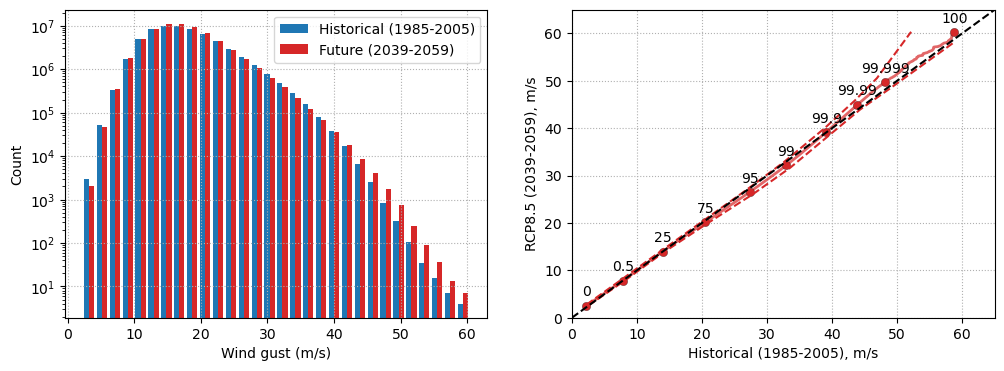

In [49]:
plt.figure(figsize=[12,4])

plt.subplot(1,2,1)
plt.hist([hist_conv.squeeze(),rcp_conv_values.squeeze()],log=True,bins=30,color=["tab:blue","tab:red"],label=["Historical (1985-2005)","Future (2039-2059)"]);
plt.legend()
plt.gca().grid(ls=":")
plt.ylabel("Count")
plt.xlabel("Wind gust (m/s)")

plt.subplot(1,2,2)
plot_qq(hist_conv.squeeze(), rcp_conv_values.squeeze(), "tab:red", [0,65], [0,0.5,25,75,95,99,99.9,99.99,99.999,100], hist_conv_years, rcp_conv_years, 100)
#plt.title("Daily maximum convective wind gusts")
plt.xlabel("Historical (1985-2005), m/s")
plt.ylabel("RCP8.5 (2039-2059), m/s")

#plt.savefig("/g/data/eg3/ab4502/figs/barpa/future_gust_change_barpacm2.jpeg",dpi=400,bbox_inches="tight")

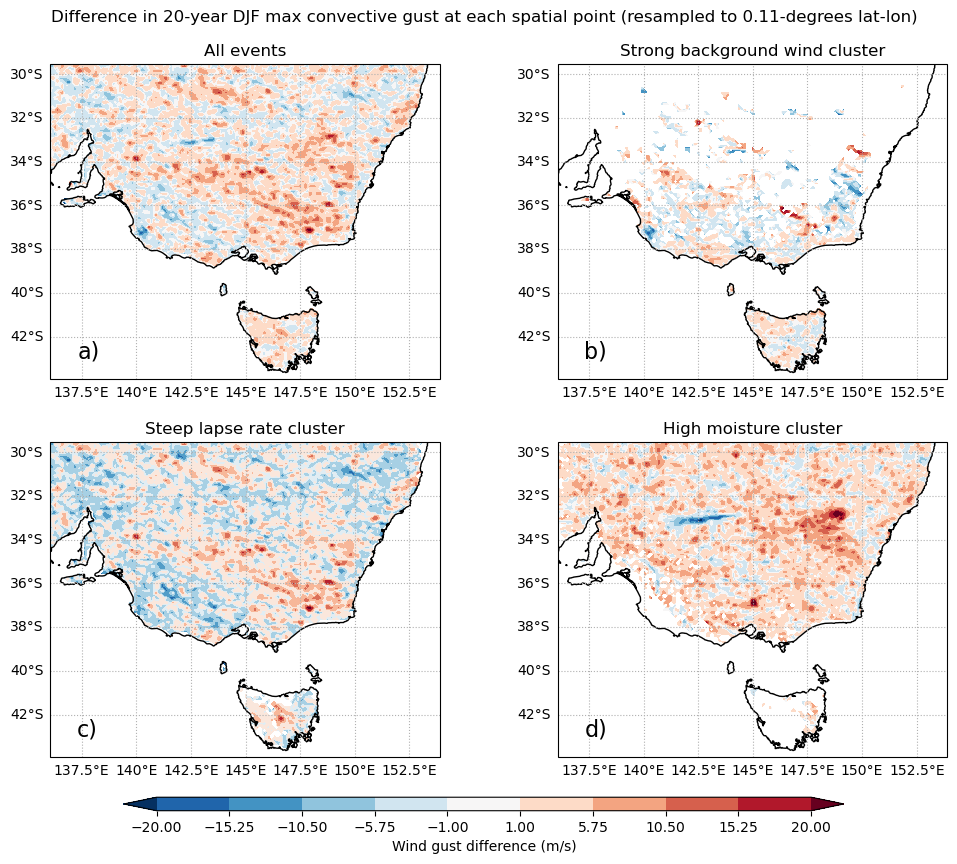

In [13]:
plt.figure(figsize=[12,9])

ax=plt.subplot(2,2,1,projection=ccrs.PlateCarree())
c=xr.plot.contourf(max_rcp["max"].max("year_month") - max_hist["max"].max("year_month"),
                   levels=list(np.linspace(-20,-1,5))+list(np.linspace(1,20,5)),
                   cmap=plt.get_cmap("RdBu_r"),add_colorbar=False)
ax.coastlines()
plt.title("All events")
plt.suptitle("Difference in 20-year DJF max convective gust at each spatial point (resampled to 0.11-degrees lat-lon)",y=0.94)
ax.gridlines(ls=":",draw_labels=["bottom","left"])
ax.text(137.3,-43,"a)",size=16)

ax=plt.subplot(2,2,2,projection=ccrs.PlateCarree())
c=xr.plot.contourf(max_rcp["cluster0_max"].max("year_month") - max_hist["cluster0_max"].max("year_month"),
                   levels=list(np.linspace(-20,-1,5))+list(np.linspace(1,20,5)),
                   cmap=plt.get_cmap("RdBu_r"),add_colorbar=False)
plt.title("Strong background wind cluster")
ax.coastlines()
ax.gridlines(ls=":",draw_labels=["bottom","left"])
ax.text(137.3,-43,"b)",size=16)

ax=plt.subplot(2,2,3,projection=ccrs.PlateCarree())
c=xr.plot.contourf(max_rcp["cluster1_max"].max("year_month") - max_hist["cluster1_max"].max("year_month"),
                   levels=list(np.linspace(-20,-1,5))+list(np.linspace(1,20,5)),
                   cmap=plt.get_cmap("RdBu_r"),add_colorbar=False)
plt.title("Steep lapse rate cluster")
ax.coastlines()
ax.gridlines(ls=":",draw_labels=["bottom","left"])
ax.text(137.3,-43,"c)",size=16)

ax=plt.subplot(2,2,4,projection=ccrs.PlateCarree())
c=xr.plot.contourf(max_rcp["cluster2_max"].max("year_month") - max_hist["cluster2_max"].max("year_month"),
                   levels=list(np.linspace(-20,-1,5))+list(np.linspace(1,20,5)),
                   cmap=plt.get_cmap("RdBu_r"),add_colorbar=False)
plt.title("High moisture cluster")
ax.coastlines()
ax.gridlines(ls=":",draw_labels=["bottom","left"])
ax.text(137.3,-43,"d)",size=16)

cax=plt.axes([0.2,0.05,0.6,0.015])
cb = plt.colorbar(c,cax=cax,orientation="horizontal")
cb.set_label("Wind gust difference (m/s)")

plt.savefig("/g/data/eg3/ab4502/figs/barpa/future_spatial_gust_change_barpacm.jpeg",dpi=400,bbox_inches="tight")

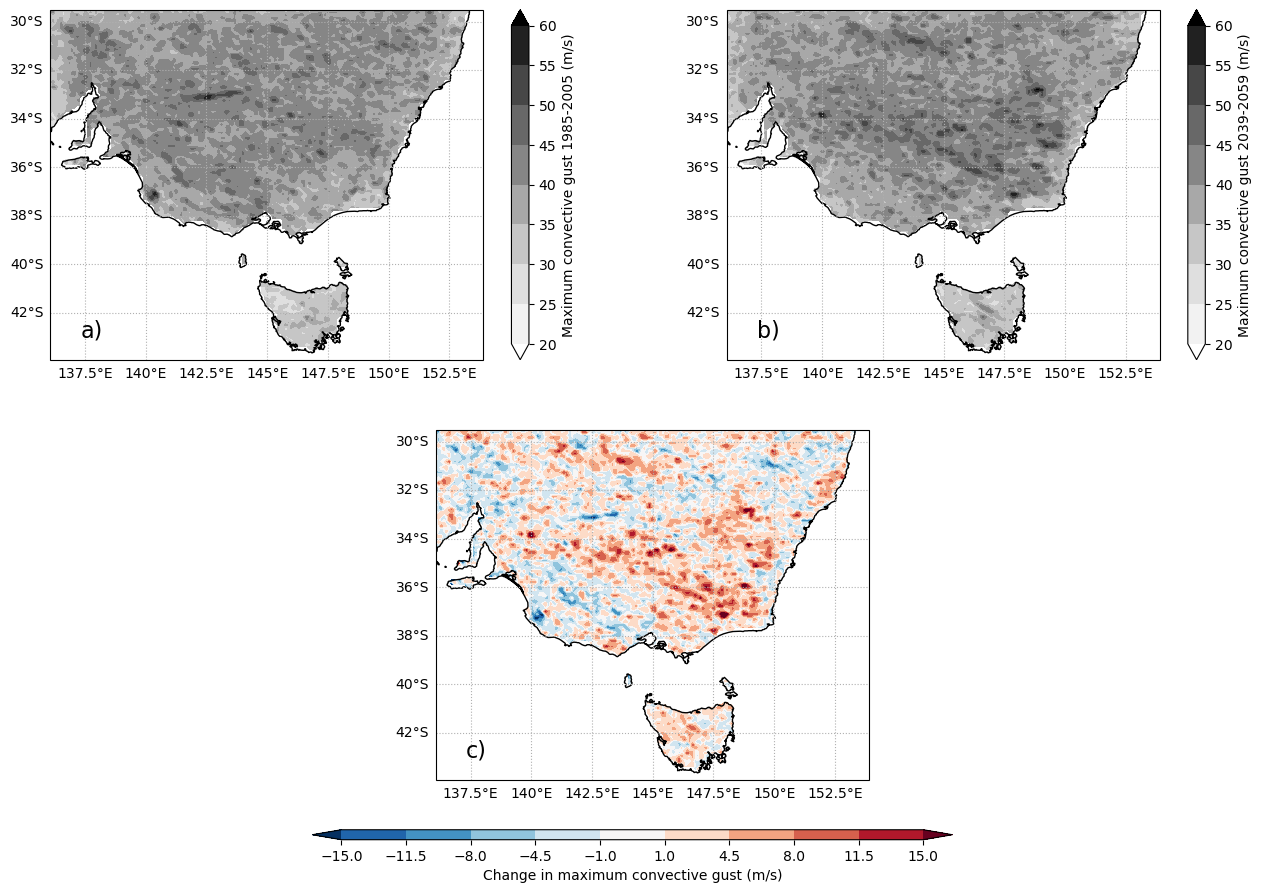

In [134]:
plt.figure(figsize=[16,10])

levs1=np.arange(20,65,5)
levs2=list(np.linspace(-15,-1,5))+list(np.linspace(1,15,5)) 

ax=plt.subplot2grid((2,2),(0,0),projection=ccrs.PlateCarree())
c=xr.plot.contourf(max_hist.max("year_month")["max"],levels=levs1,extend="both",add_colorbar=False,cmap=plt.get_cmap("Greys"))
cb=plt.colorbar(c)
cb.set_label("Maximum convective gust 1985-2005 (m/s)")
ax.coastlines()
#plt.title("20-year DJF max convective gust at each spatial point (resampled to 0.11-degrees lat-lon)",y=0.94)
plt.title("")
ax.gridlines(ls=":",draw_labels=["bottom","left"])
ax.text(137.3,-43,"a)",size=16)

ax=plt.subplot2grid((2,2),(0,1),projection=ccrs.PlateCarree())
c=xr.plot.contourf(max_rcp.max("year_month")["max"],levels=levs1,extend="both",add_colorbar=False,cmap=plt.get_cmap("Greys"))
cb=plt.colorbar(c)
cb.set_label("Maximum convective gust 2039-2059 (m/s)")
ax.coastlines()
#plt.title("20-year DJF max convective gust at each spatial point (resampled to 0.11-degrees lat-lon)",y=0.94)
plt.title("")
ax.gridlines(ls=":",draw_labels=["bottom","left"])
ax.text(137.3,-43,"b)",size=16)

ax=plt.subplot2grid((2,2),(1,0),colspan=2,projection=ccrs.PlateCarree())
c=xr.plot.contourf(max_rcp["max"].max("year_month") - max_hist["max"].max("year_month"),
                   levels=levs2,
                   cmap=plt.get_cmap("RdBu_r"),add_colorbar=False)
plt.title("")
cax=plt.axes([0.3,0.05,0.4,0.01])
cb=plt.colorbar(c,cax=cax,orientation="horizontal")
cb.set_label("Change in maximum convective gust (m/s)")
ax.coastlines()
#plt.title("Difference in 20-year DJF max convective gust at each spatial point (resampled to 0.11-degrees lat-lon)",y=0.94)
ax.gridlines(ls=":",draw_labels=["bottom","left"])
ax.text(137.3,-43,"c)",size=16)

plt.savefig("/g/data/eg3/ab4502/figs/barpa/future_spatial_gust_change_barpacm2.jpeg",dpi=400,bbox_inches="tight")

In [47]:
max_rcp.max(("lat","lon"))["max"].to_dataframe().sort_values("max",ascending=False).iloc[0:5]

,pseudo_level,time,height,max
year_month,,,,
204801,-32768,2012-09-01,10.0,60.336914
205601,-32768,2012-09-01,10.0,59.513672
205001,-32768,2012-09-01,10.0,58.166992
205812,-32768,2012-09-01,10.0,56.401367
204612,-32768,2012-09-01,10.0,53.083984


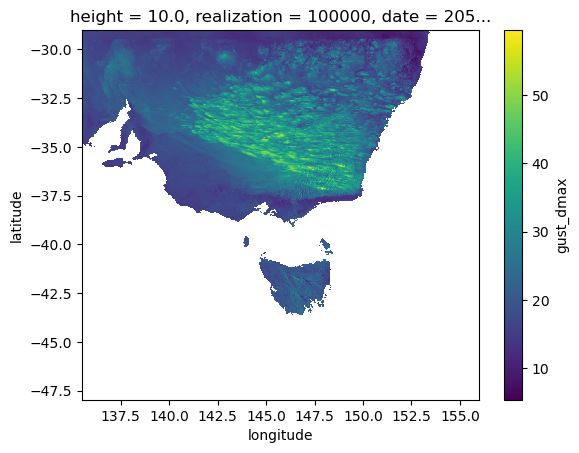

In [59]:
xr.open_dataset("/scratch/eg3/ab4502/barpa_scw_ACCESS1-0_rcp85_0_20560101_20560131.nc")["gust_dmax"].sel({"date":"2056-01-11"}).plot()

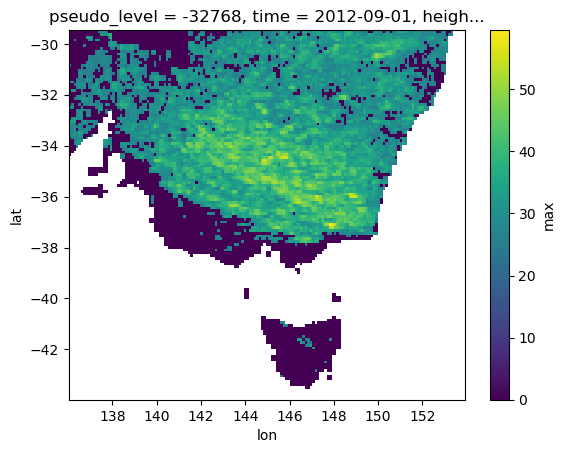

In [53]:
max_rcp.sel({"year_month":"205601"})["max"].plot()

NameError: name 'hist_all' is not defined

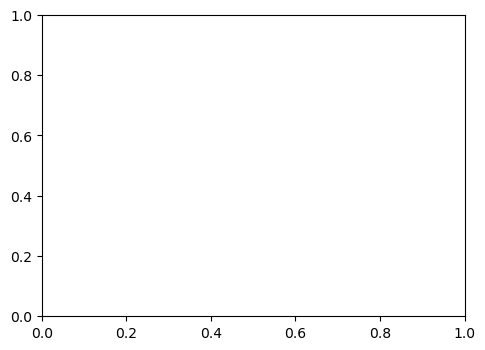

In [ ]:
plt.figure(figsize=[12,18])
plt.subplot(4,2,1)
plot_qq(hist_all.query("wgr_dmax<1.5")["gust_dmax"].values, rcp_all.query("wgr_dmax<1.5")["gust_dmax"].values, 1000, "tab:grey")
plt.title("All daily-domain maximum gusts (land points only)")
plt.ylabel("2039-2059")
plt.xlabel("1985-2005")

plt.subplot(4,2,2)
plot_qq(hist_all.query("wgr_dmax>=1.5")["gust_dmax"].values, rcp_all.query("wgr_dmax>=1.5")["gust_dmax"].values, 1000, "tab:grey")
plt.title("Convective daily-domain maximum gusts (land points only)")
plt.xlabel("1985-2005")

plt.subplot(4,2,3)
plot_qq(hist_all.query("(cluster==0) & (wgr_dmax<1.5)")["gust_dmax"].values, rcp_all.query("(cluster==0) & (wgr_dmax<1.5)")["gust_dmax"].values, 500, plt.get_cmap("RdYlBu")(0.1))

plt.subplot(4,2,4)
plot_qq(hist_all.query("(cluster==0) & (wgr_dmax>=1.5)")["gust_dmax"].values, rcp_all.query("(cluster==0) & (wgr_dmax>=1.5)")["gust_dmax"].values, 500, plt.get_cmap("RdYlBu")(0.1))

plt.subplot(4,2,5)
plot_qq(hist_all.query("(cluster==1) & (wgr_dmax<1.5)")["gust_dmax"].values, rcp_all.query("(cluster==1) & (wgr_dmax<1.5)")["gust_dmax"].values, 500, plt.get_cmap("RdYlBu")(0.46))

plt.subplot(4,2,6)
plot_qq(hist_all.query("(cluster==1) & (wgr_dmax>=1.5)")["gust_dmax"].values, rcp_all.query("(cluster==1) & (wgr_dmax>=1.5)")["gust_dmax"].values, 500, plt.get_cmap("RdYlBu")(0.46))

plt.subplot(4,2,7)
plot_qq(hist_all.query("(cluster==2) & (wgr_dmax<1.5)")["gust_dmax"].values, rcp_all.query("(cluster==2) & (wgr_dmax<1.5)")["gust_dmax"].values, 500, plt.get_cmap("RdYlBu")(0.9))

plt.subplot(4,2,8)
plot_qq(hist_all.query("(cluster==2) & (wgr_dmax>=1.5)")["gust_dmax"].values, rcp_all.query("(cluster==2) & (wgr_dmax>=1.5)")["gust_dmax"].values, 500, plt.get_cmap("RdYlBu")(0.9))



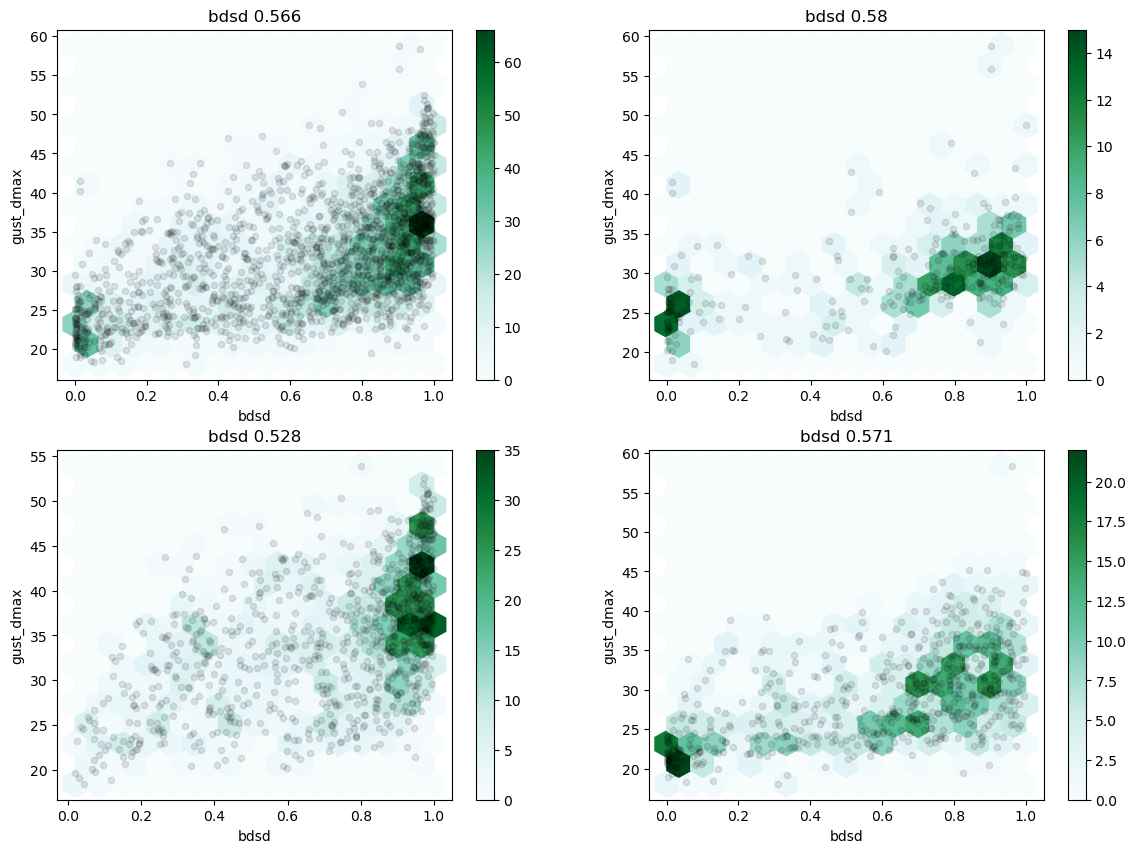

In [81]:
def test_relation(v,df,ax):
    
    df.plot(kind="hexbin",y="gust_dmax",x=v,ax=ax,gridsize=15);
    df.plot(kind="scatter",y="gust_dmax",x=v,ax=ax,alpha=0.1,color="none",edgecolor="k");    
    plt.title(v+" "+str(df[[v,"gust_dmax"]].corr(method="spearman").iloc[0,1].round(3)))

plt.figure(figsize=[14,10])
v = "bdsd"
test_relation(v, hist_conv, plt.subplot(2,2,1))
test_relation(v, hist_conv.query("cluster==0"), plt.subplot(2,2,2))
test_relation(v, hist_conv.query("cluster==1"), plt.subplot(2,2,3))
test_relation(v, hist_conv.query("cluster==2"), plt.subplot(2,2,4))

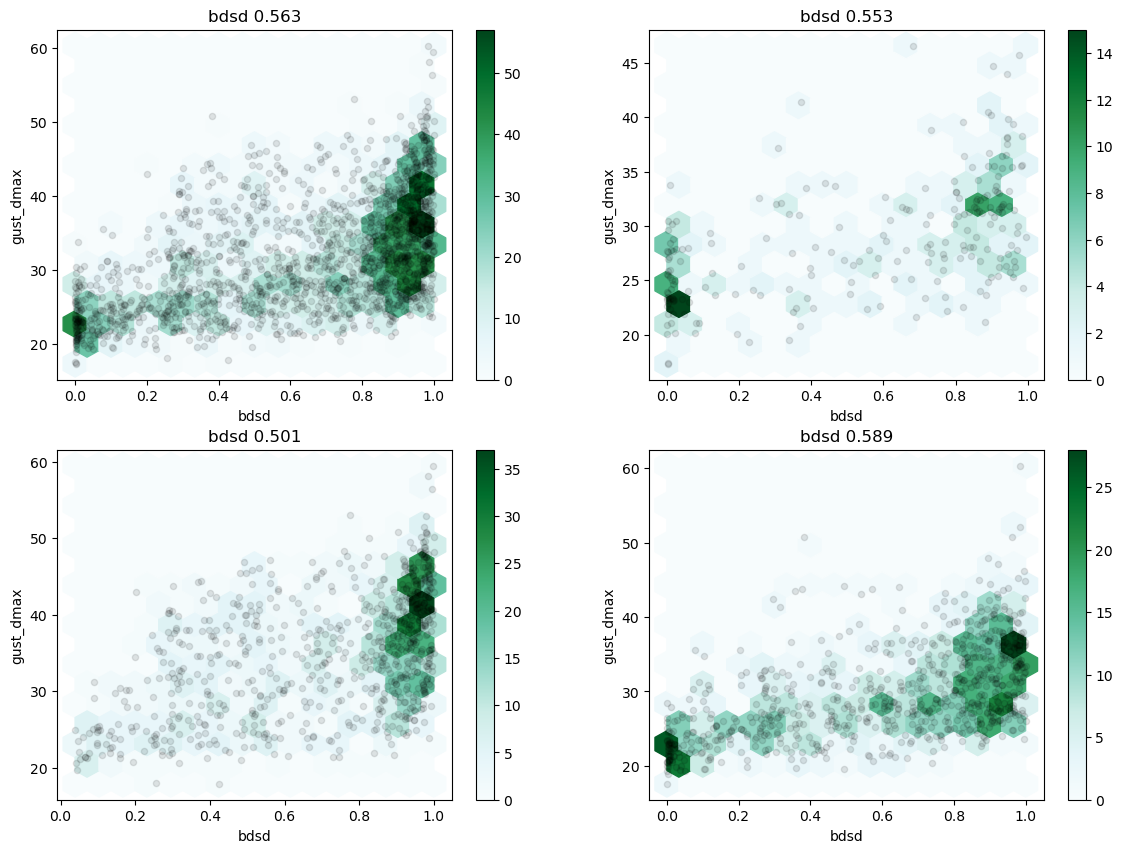

In [85]:
plt.figure(figsize=[14,10])
v = "bdsd"
test_relation(v, rcp_conv, plt.subplot(2,2,1))
test_relation(v, rcp_conv.query("cluster==0"), plt.subplot(2,2,2))
test_relation(v, rcp_conv.query("cluster==1"), plt.subplot(2,2,3))
test_relation(v, rcp_conv.query("cluster==2"), plt.subplot(2,2,4))

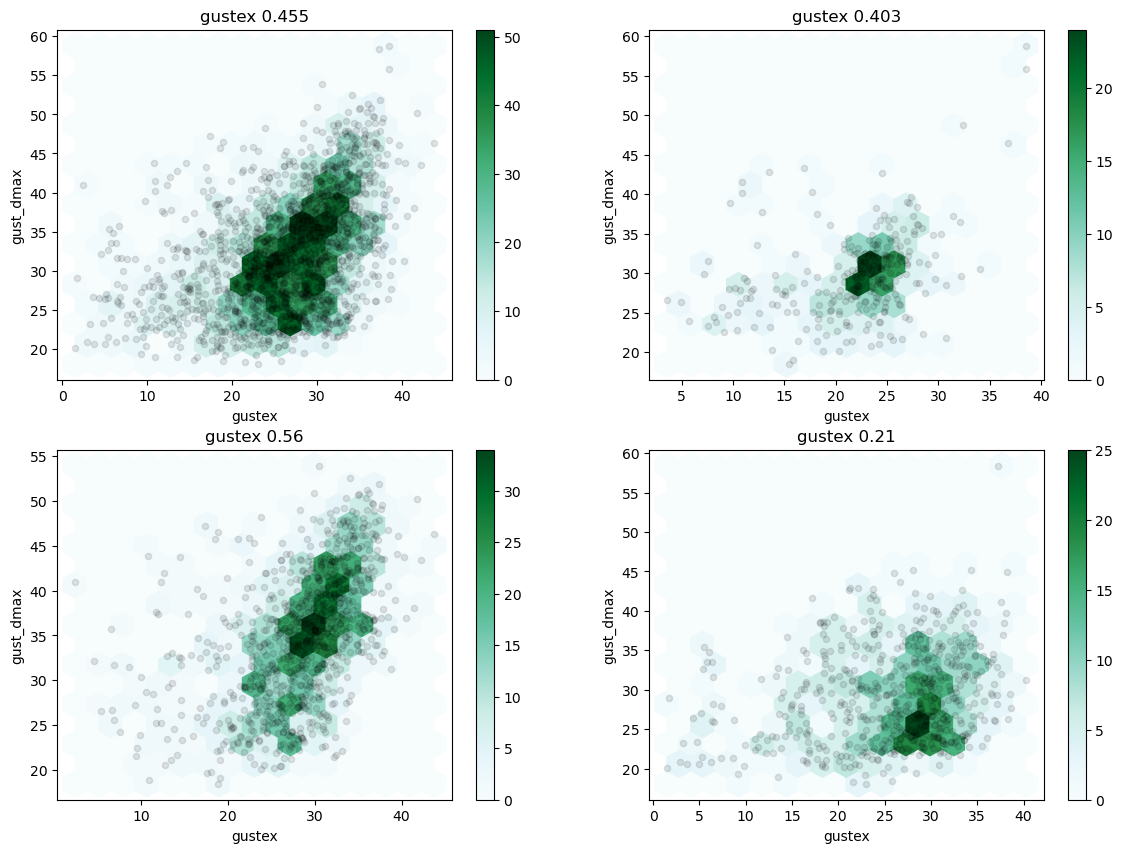

In [82]:
plt.figure(figsize=[14,10])
v = "gustex"
test_relation(v, hist_conv, plt.subplot(2,2,1))
test_relation(v, hist_conv.query("cluster==0"), plt.subplot(2,2,2))
test_relation(v, hist_conv.query("cluster==1"), plt.subplot(2,2,3))
test_relation(v, hist_conv.query("cluster==2"), plt.subplot(2,2,4))

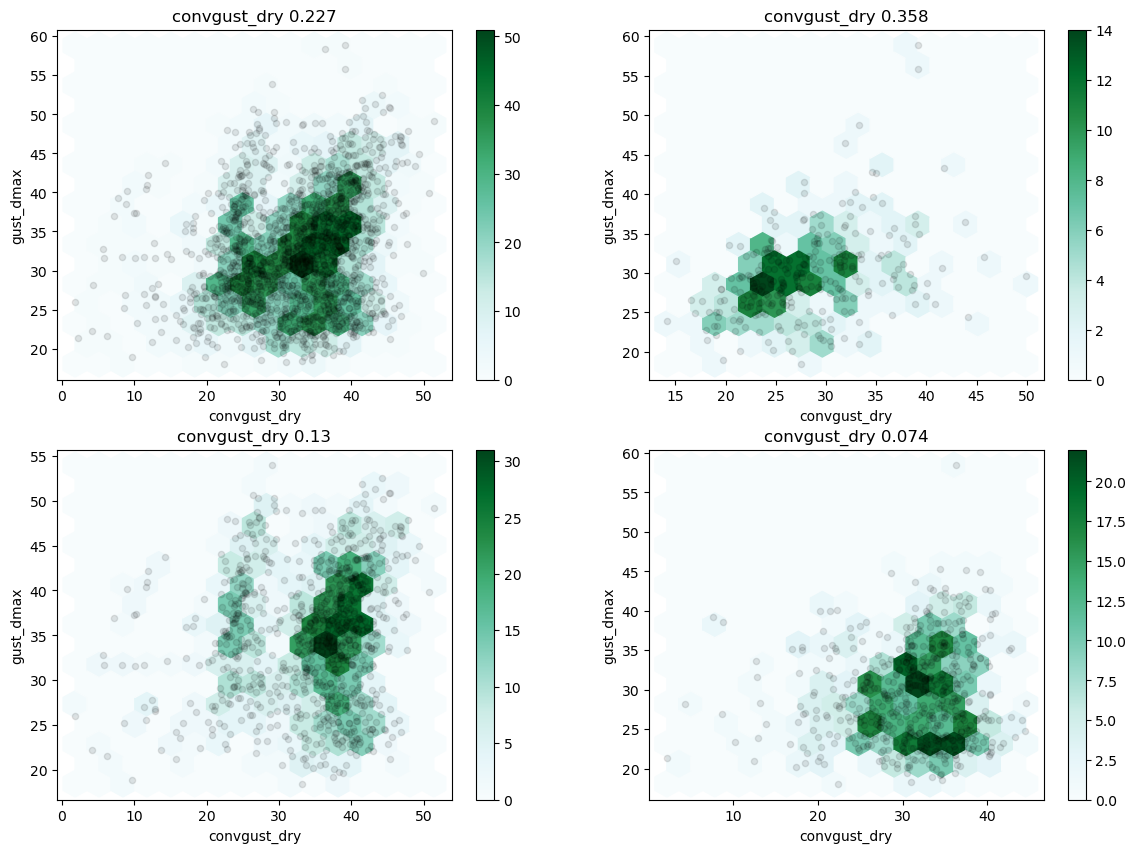

In [83]:
plt.figure(figsize=[14,10])
v = "convgust_dry"
test_relation(v, hist_conv, plt.subplot(2,2,1))
test_relation(v, hist_conv.query("cluster==0"), plt.subplot(2,2,2))
test_relation(v, hist_conv.query("cluster==1"), plt.subplot(2,2,3))
test_relation(v, hist_conv.query("cluster==2"), plt.subplot(2,2,4))

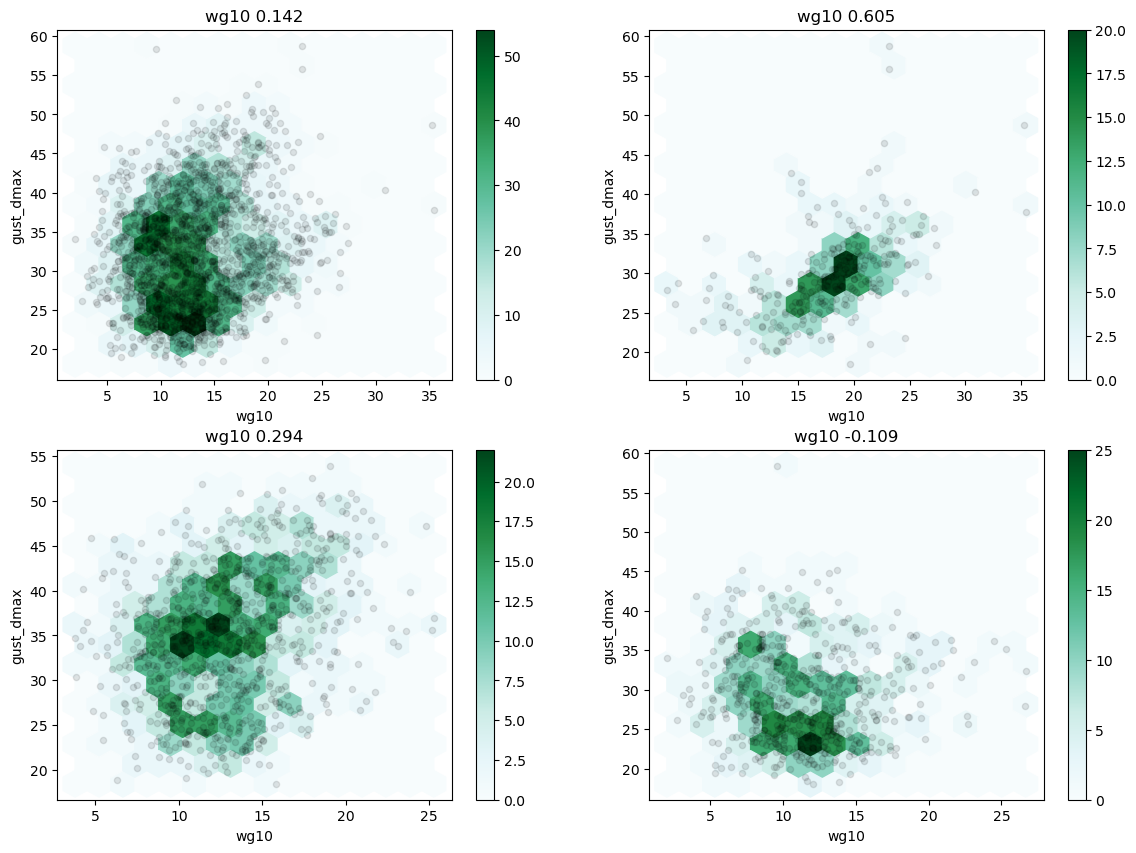

In [84]:
plt.figure(figsize=[14,10])
v = "wg10"
test_relation(v, hist_conv, plt.subplot(2,2,1))
test_relation(v, hist_conv.query("cluster==0"), plt.subplot(2,2,2))
test_relation(v, hist_conv.query("cluster==1"), plt.subplot(2,2,3))
test_relation(v, hist_conv.query("cluster==2"), plt.subplot(2,2,4))